Our goal is to analyze public sentiment, engagement, and thematic patterns in user comments on NASA’s climate change Facebook posts using Natural Language Processing (NLP) and Machine Learning (ML) techniques.
-------

In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings("ignore")

In [3]:
df= pd.read_csv("climate_nasa.csv")
df

,date,likesCount,profileName,commentsCount,text
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."
...,...,...,...,...,...
517,2022-12-22T17:21:37.000Z,0,9e17b1a6422032d47472f0216c73aafda7587e302eed5e...,NaN,One can only hope for a peak 😞
518,2022-12-22T17:19:51.000Z,1,48e55d898603a136aefc44771f248bffd67242583a462a...,5.0,what is the error margin for the temperature e...
519,2022-12-22T17:12:57.000Z,3,ca5d2611814cf8c9844ed06d9916d876d2dba94dac5ff2...,NaN,We all should volenteerly help in reducing Glo...
520,2022-12-22T17:01:12.000Z,1,a87c8aea74c9b97002b368d6143ce9c2809dcaec3103fb...,NaN,Sergio Yepes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           522 non-null    object 
 1   likesCount     522 non-null    int64  
 2   profileName    522 non-null    object 
 3   commentsCount  244 non-null    float64
 4   text           504 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 20.5+ KB


In [7]:
df.describe()

,likesCount,commentsCount
count,522.000000,244.000000
mean,4.720307,8.696721
std,12.053556,12.266176
min,0.000000,1.000000
25%,0.000000,2.000000
50%,1.000000,5.000000
75%,4.000000,10.000000
max,126.000000,93.000000


Dataset Overview
-----
 Thisdatasetencompassesover500usercommentscollectedfromhigh-performing
 postsonNASA'sFacebookpagededicatedtoclimatechange
 (https://web.facebook.com/NASAClimateChange/).Thecomments,gatheredfrom
 variouspostsbetween2020and2023,offeradiverserangeofpublicopinionsand
 sentimentsaboutclimatechangeandNASA'srelatedactivities.


In [13]:
# Convert date
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop missing or invalid dates
df = df.dropna(subset=['date', 'text'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 504 entries, 0 to 521
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   date           504 non-null    datetime64[ns, UTC]
 1   likesCount     504 non-null    int64              
 2   profileName    504 non-null    object             
 3   commentsCount  242 non-null    float64            
 4   text           504 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(2)
memory usage: 23.6+ KB


In [20]:
# Fill likes/comments count missing values
df['likesCount'] = df['likesCount'].fillna(0)
df['commentsCount'] = df['commentsCount'].fillna(0)

# Clean text
import re
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df['CleanText'] = df['text'].apply(clean_text)

In [26]:
df


,date,likesCount,profileName,commentsCount,text,CleanText
0,2022-09-07 17:12:32+00:00,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,0.0,Neat comparison I have not heard it before.\n ...,neat comparison i have not heard it before\n i...
1,2022-09-08 14:51:13+00:00,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,0.0,An excellent way to visualise the invisible! T...,an excellent way to visualise the invisible th...
2,2022-09-07 17:19:41+00:00,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...,does the coghg in the troposphere affect the s...
3,2022-09-08 00:51:30+00:00,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,0.0,excellent post! I defo feel the difference - o...,excellent post i defo feel the difference one...
4,2022-09-07 19:06:20+00:00,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart...",yes and carbon dioxide does not harm the earth...
...,...,...,...,...,...,...
517,2022-12-22 17:21:37+00:00,0,9e17b1a6422032d47472f0216c73aafda7587e302eed5e...,0.0,One can only hope for a peak 😞,one can only hope for a peak
518,2022-12-22 17:19:51+00:00,1,48e55d898603a136aefc44771f248bffd67242583a462a...,5.0,what is the error margin for the temperature e...,what is the error margin for the temperature e...
519,2022-12-22 17:12:57+00:00,3,ca5d2611814cf8c9844ed06d9916d876d2dba94dac5ff2...,0.0,We all should volenteerly help in reducing Glo...,we all should volenteerly help in reducing glo...
520,2022-12-22 17:01:12+00:00,1,a87c8aea74c9b97002b368d6143ce9c2809dcaec3103fb...,0.0,Sergio Yepes,sergio yepes


In [30]:
df["commentsCount"]= df["commentsCount"].astype("int64")
df

,date,likesCount,profileName,commentsCount,text,CleanText
0,2022-09-07 17:12:32+00:00,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,0,Neat comparison I have not heard it before.\n ...,neat comparison i have not heard it before\n i...
1,2022-09-08 14:51:13+00:00,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,0,An excellent way to visualise the invisible! T...,an excellent way to visualise the invisible th...
2,2022-09-07 17:19:41+00:00,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3,Does the CO2/ghg in the troposphere affect the...,does the coghg in the troposphere affect the s...
3,2022-09-08 00:51:30+00:00,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,0,excellent post! I defo feel the difference - o...,excellent post i defo feel the difference one...
4,2022-09-07 19:06:20+00:00,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26,"Yes, and carbon dioxide does not harm the Eart...",yes and carbon dioxide does not harm the earth...
...,...,...,...,...,...,...
517,2022-12-22 17:21:37+00:00,0,9e17b1a6422032d47472f0216c73aafda7587e302eed5e...,0,One can only hope for a peak 😞,one can only hope for a peak
518,2022-12-22 17:19:51+00:00,1,48e55d898603a136aefc44771f248bffd67242583a462a...,5,what is the error margin for the temperature e...,what is the error margin for the temperature e...
519,2022-12-22 17:12:57+00:00,3,ca5d2611814cf8c9844ed06d9916d876d2dba94dac5ff2...,0,We all should volenteerly help in reducing Glo...,we all should volenteerly help in reducing glo...
520,2022-12-22 17:01:12+00:00,1,a87c8aea74c9b97002b368d6143ce9c2809dcaec3103fb...,0,Sergio Yepes,sergio yepes


In [38]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon', download_dir='nltk_data')



[nltk_data] Downloading package vader_lexicon to nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [40]:
sid = SentimentIntensityAnalyzer()
df['Sentiment'] = df['CleanText'].apply(lambda x: sid.polarity_scores(x)['compound'])
df['SentimentLabel'] = df['Sentiment'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))

In [42]:
df

,date,likesCount,profileName,commentsCount,text,CleanText,Sentiment,SentimentLabel
0,2022-09-07 17:12:32+00:00,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,0,Neat comparison I have not heard it before.\n ...,neat comparison i have not heard it before\n i...,0.7702,positive
1,2022-09-08 14:51:13+00:00,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,0,An excellent way to visualise the invisible! T...,an excellent way to visualise the invisible th...,0.7650,positive
2,2022-09-07 17:19:41+00:00,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3,Does the CO2/ghg in the troposphere affect the...,does the coghg in the troposphere affect the s...,0.2960,positive
3,2022-09-08 00:51:30+00:00,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,0,excellent post! I defo feel the difference - o...,excellent post i defo feel the difference one...,0.1027,positive
4,2022-09-07 19:06:20+00:00,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26,"Yes, and carbon dioxide does not harm the Eart...",yes and carbon dioxide does not harm the earth...,0.6059,positive
...,...,...,...,...,...,...,...,...
517,2022-12-22 17:21:37+00:00,0,9e17b1a6422032d47472f0216c73aafda7587e302eed5e...,0,One can only hope for a peak 😞,one can only hope for a peak,0.4404,positive
518,2022-12-22 17:19:51+00:00,1,48e55d898603a136aefc44771f248bffd67242583a462a...,5,what is the error margin for the temperature e...,what is the error margin for the temperature e...,-0.4019,negative
519,2022-12-22 17:12:57+00:00,3,ca5d2611814cf8c9844ed06d9916d876d2dba94dac5ff2...,0,We all should volenteerly help in reducing Glo...,we all should volenteerly help in reducing glo...,0.5106,positive
520,2022-12-22 17:01:12+00:00,1,a87c8aea74c9b97002b368d6143ce9c2809dcaec3103fb...,0,Sergio Yepes,sergio yepes,0.0000,neutral


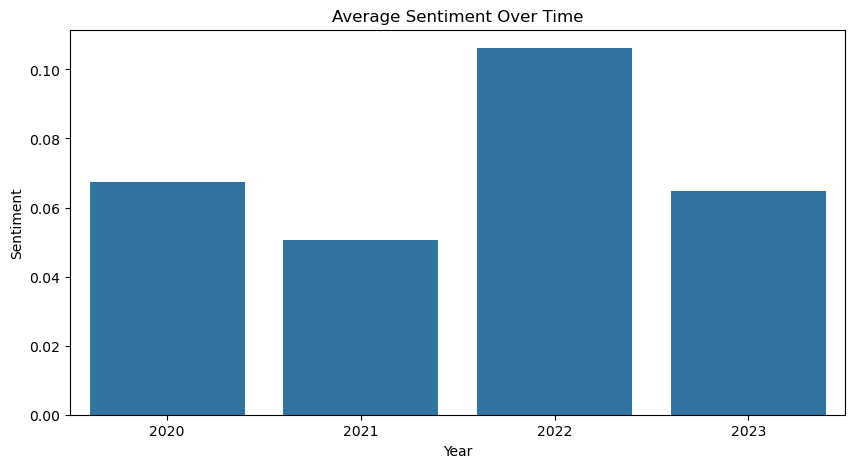

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment over time
df['Year'] = df['date'].dt.year
sentiment_by_year = df.groupby('Year')['Sentiment'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=sentiment_by_year, x='Year', y='Sentiment')
plt.title("Average Sentiment Over Time")
plt.show()


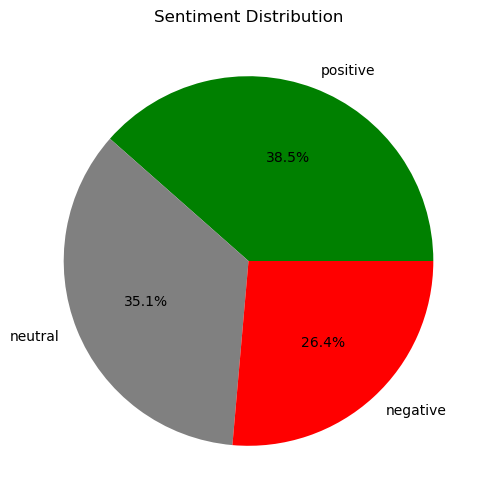

In [58]:
sentiment_counts = df['SentimentLabel'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['green', 'gray', 'red'])
plt.title('Sentiment Distribution')
plt.show()

**Purpose**: Understand the general public tone around climate topics.


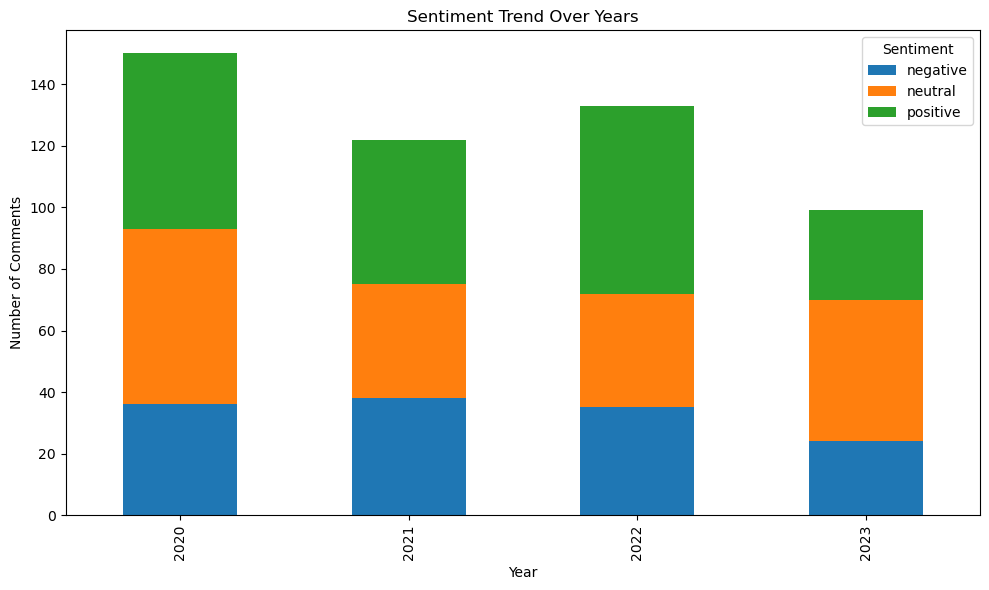

In [66]:
yearly_sentiment = df.groupby(['Year', 'SentimentLabel']).size().unstack().fillna(0)

yearly_sentiment.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Sentiment Trend Over Years")
plt.ylabel("Number of Comments")
plt.xlabel("Year")
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


**Purpose**: Track shifts in public perception about climate change over time.


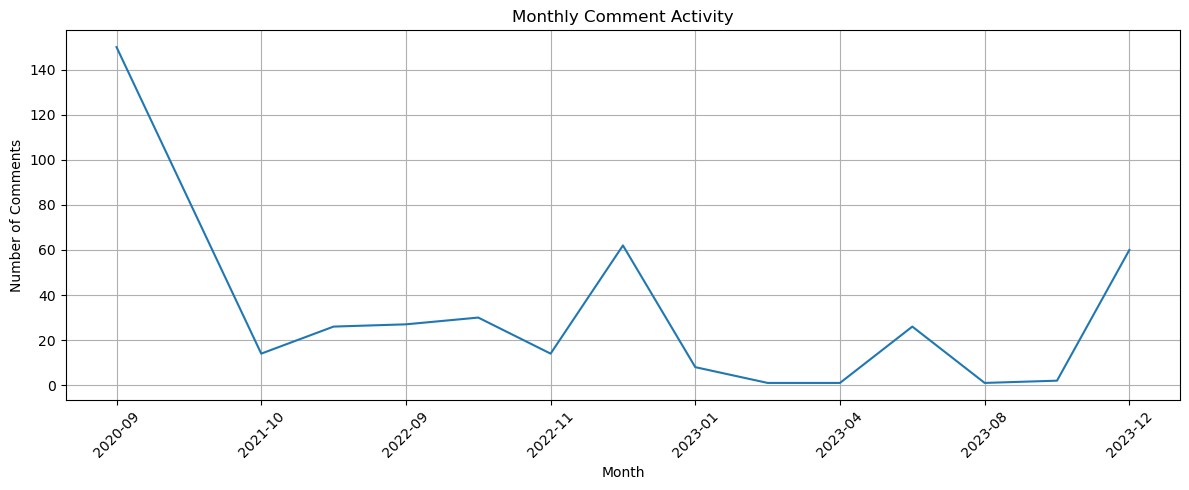

In [68]:
df['Month'] = df['date'].dt.to_period('M').astype(str)
monthly_comments = df.groupby('Month').size()

plt.figure(figsize=(12, 5))
monthly_comments.plot()
plt.title("Monthly Comment Activity")
plt.xlabel("Month")
plt.ylabel("Number of Comments")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


**Purpose**: Identify peak periods of public discussion, possibly related to events or news.


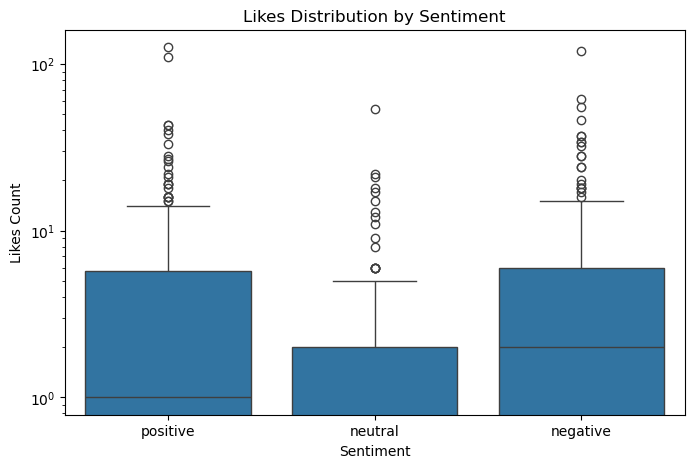

In [72]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='SentimentLabel', y='likesCount')
plt.title("Likes Distribution by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Likes Count")
plt.yscale('log')  # For large variation in likes
plt.show()


**Purpose**: Determine whether positive/negative comments receive more engagement.


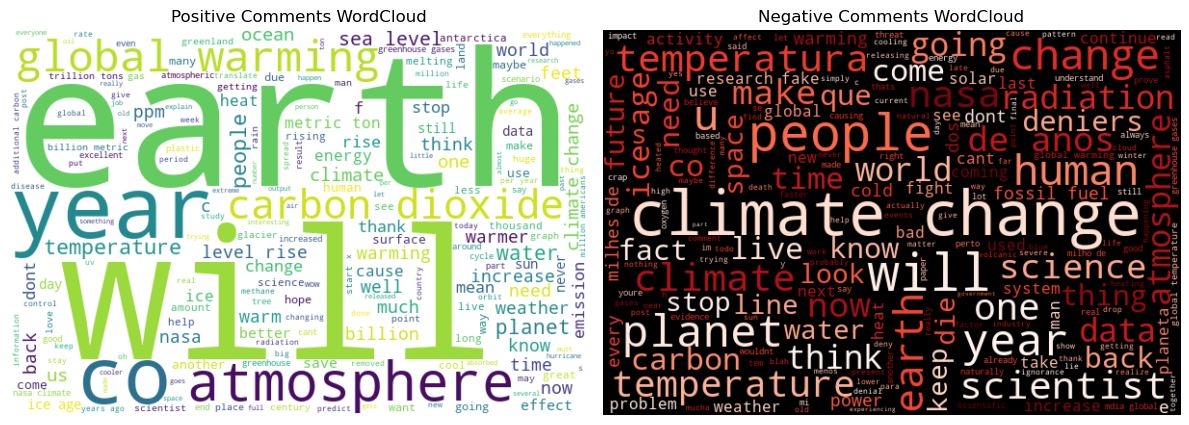

In [76]:
from wordcloud import WordCloud
positive_text = ' '.join(df[df['SentimentLabel'] == 'positive']['CleanText'])
negative_text = ' '.join(df[df['SentimentLabel'] == 'negative']['CleanText'])

plt.figure(figsize=(12, 6))

# Positive word cloud
plt.subplot(1, 2, 1)
wordcloud_pos = WordCloud(width=600, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Comments WordCloud")

# Negative word cloud
plt.subplot(1, 2, 2)
wordcloud_neg = WordCloud(width=600, height=400, background_color='black', colormap='Reds').generate(negative_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Comments WordCloud")

plt.tight_layout()
plt.show()


**Purpose**: Highlight common themes and public language in climate-related discussions.


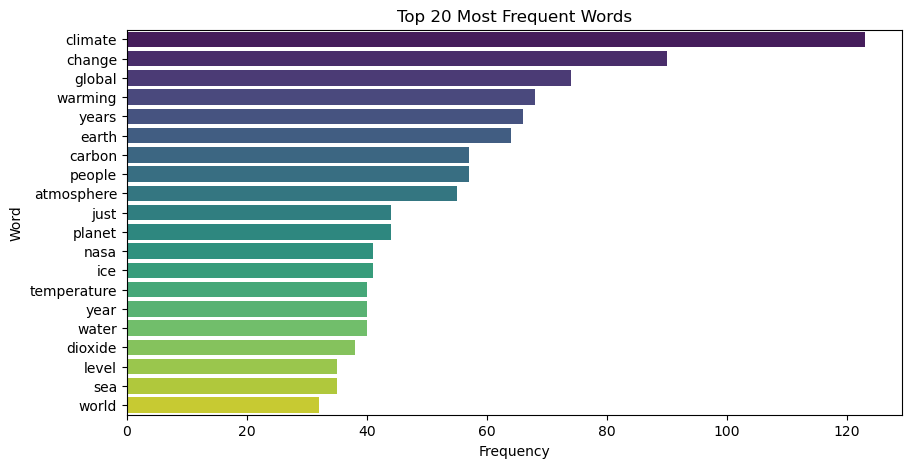

In [90]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df['CleanText'])
word_freq = X.toarray().sum(axis=0)
words = vectorizer.get_feature_names_out()
freq_df = pd.DataFrame({'word': words, 'frequency': word_freq}).sort_values(by='frequency', ascending=False).head(20)

plt.figure(figsize=(10,5))
sns.barplot(data=freq_df, x='frequency', y='word', palette='viridis')
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


**Purpose**: Reveal central discussion topics in the dataset.



Topic 1:
atmosphere know temperature earth people global time climate change planet


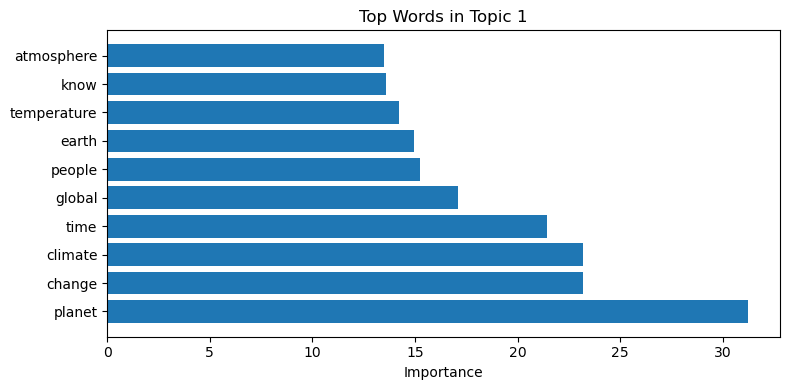


Topic 2:
dont que weather age years ice global warming change climate


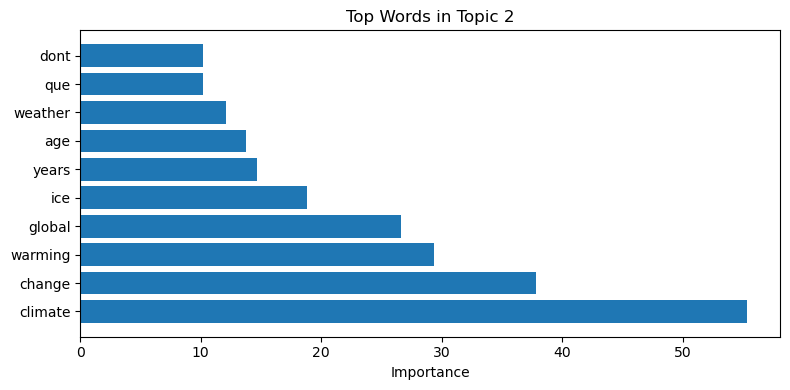


Topic 3:
years data world people going like just change nasa climate


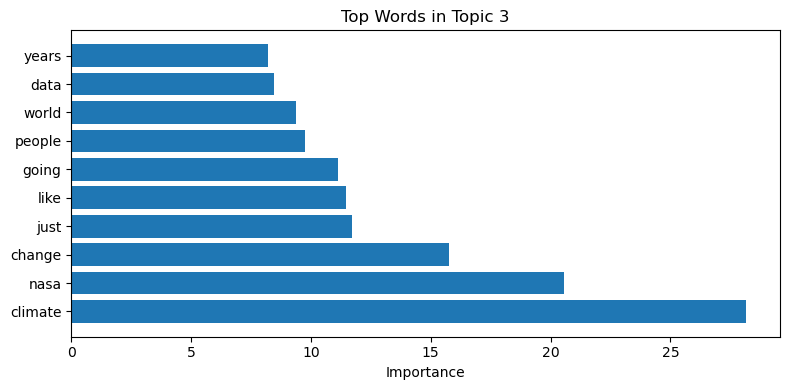


Topic 4:
tons billion rise water level feet dioxide sea atmosphere carbon


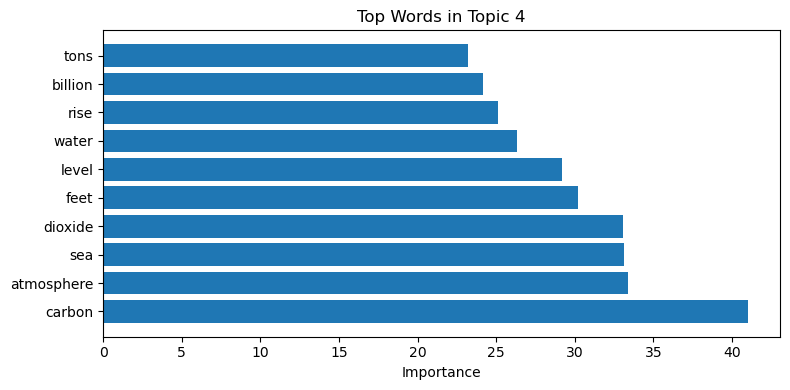


Topic 5:
ppm carbon heat energy people change sun climate years earth


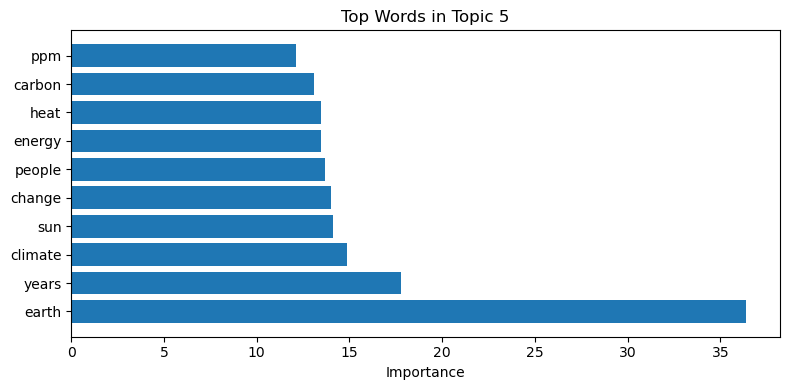

In [102]:
# Step 1: Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Vectorize the clean text
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(df['CleanText'])

# Step 3: Create and fit the LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # You can change the number of topics
lda.fit(doc_term_matrix)

# Step 4: Visualize the topics
for idx, topic in enumerate(lda.components_):
    print(f"\nTopic {idx + 1}:")
    top_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
    print(" ".join(top_words))

    # Optional: plot bar graph for each topic
    plt.figure(figsize=(8, 4))
    plt.barh(top_words, topic[topic.argsort()[-10:]])
    plt.xlabel("Importance")
    plt.title(f"Top Words in Topic {idx + 1}")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()


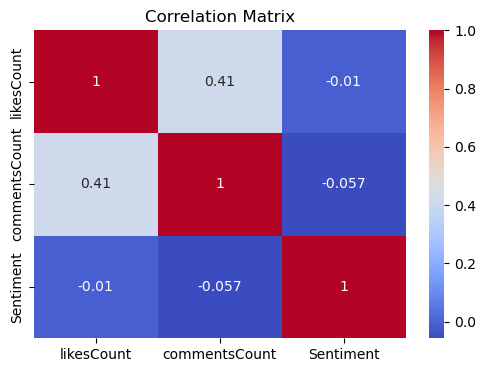

In [106]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['likesCount', 'commentsCount', 'Sentiment']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


**Purpose**: Explore relationships between sentiment and engagement metrics.


In [110]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Features: sentiment + vectorized text
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=300)
X_tfidf = tfidf.fit_transform(df['CleanText'])
X_sentiment = df[['Sentiment']].values
from scipy.sparse import hstack

X = hstack([X_tfidf, X_sentiment])
y = df['likesCount']  # or use CommentsCount

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")


MAE: 7.412759049931718


`here we got MAE(mean absolute error) as 7.4127590 let us check the mean of likecounts of comments if it is low is MAE is big or else it is not so big`

In [114]:
df["likesCount"].describe()

count    504.000000
mean       4.869048
std       12.239115
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max      126.000000
Name: likesCount, dtype: float64

__🎯 Interpretation of MAE = 7.41__

__➤ Key Insight:__
Most comments have very low likes (median is 1, 75% have ≤ 4).
A few comments get very high likes (up to 126), which skews the data

__➤ So__
An MAE of 7.41 is quite high — it's predicting the number of likes with an average error bigger than the value itself for most comments.


In [130]:
# Transform target
df['LogLikes'] = np.log1p(df['likesCount'])  # log(1 + x) avoids log(0) issues

# Then change:
y = df['LogLikes']

# After prediction
y_pred = model.predict(X_test)
y_pred_actual = np.expm1(y_pred)  # Reverse log1p
y_test_actual = np.expm1(y_test)

# Evaluate on original scale
print("MAE:", mean_absolute_error(y_test_actual, y_pred_actual))


MAE: 1.2912681964293388e+50


Applying a __Log Transform__ to Likes, this reduces the effect of large outliers,Reduces skew, improves MAE as we have observed from above

In [135]:
# Convert to categorical labels
def bucket_likes(x):
    if x == 0:
        return 'none'
    elif x <= 2:
        return 'low'
    elif x <= 10:
        return 'medium'
    else:
        return 'viral'

df['EngagementLevel'] = df['likesCount'].apply(bucket_likes)


In [171]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import hstack
import seaborn as sns
import matplotlib.pyplot as plt

# Vectorize clean text
tfidf = TfidfVectorizer(max_features=300)
X_text = tfidf.fit_transform(df['CleanText'])

# Add sentiment as a feature
X_sentiment = df[['Sentiment']].values
X = hstack([X_text, X_sentiment])

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['EngagementLevel'])  # Converts to 0,1,2,3

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
# Convert numeric back to labels
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Classification report
print(classification_report(y_test_labels, y_pred_labels))




              precision    recall  f1-score   support

         low       0.32      0.43      0.37        23
      medium       0.17      0.06      0.08        18
        none       0.53      0.70      0.61        47
       viral       0.50      0.08      0.13        13

    accuracy                           0.45       101
   macro avg       0.38      0.32      0.30       101
weighted avg       0.42      0.45      0.40       101



**Purpose**: Quantify the accuracy of the engagement prediction model.


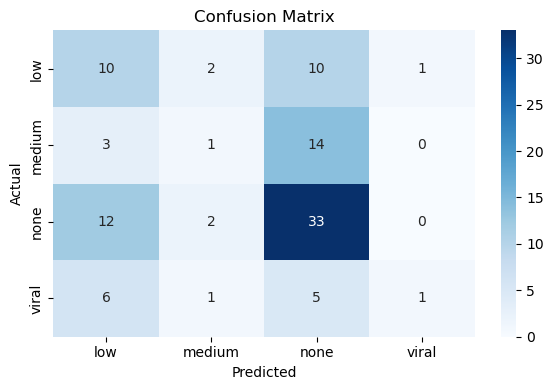

In [173]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels, labels=label_encoder.classes_)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


**Purpose**: Understand where the model performs well or needs improvement.


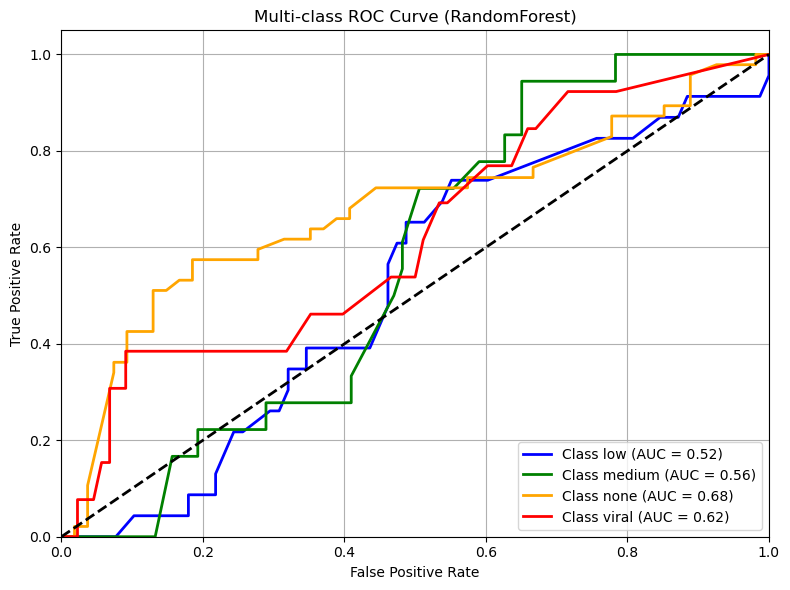

In [153]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from scipy.sparse import hstack
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# One-hot encode the labels
class_names = label_encoder.classes_
y_bin = label_binarize(y, classes=[0, 1, 2, 3])
n_classes = y_bin.shape[1]
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.2, random_state=42)

clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
clf.fit(X_train, y_train_bin)

y_score = clf.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(8,6))
colors = ['blue', 'green', 'orange', 'red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve (RandomForest)')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


**Purpose**: Visualize classification model's ability to distinguish between engagement levels.
